# Analyse d'une base de données des clients d'un grossiste 

## Présentation de la base de données

__L'ensemble de données comprend 6 variables sur 440 clients. Les valeurs sont quantitatives et sont les suivantes:__

- Fresh: dépenses annuelles en produits frais
- Milk: dépenses annuelles en produits laitiers
- Grocery: dépenses annuelles en produits d'épicerie
- Frozen: dépenses annuelles en produits surgelés
- Detergents_paper: dépenses annuelles en détergents et produits en papier
- Delicassen: dépenses annuelles en produits d'épicerie fine

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Import des données
data = pd.read_excel('MT15_exam_acp_classification.xls',index_col = 0)  # Faire colonne 0 comme index
data.head()

Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
Client 1  12669  9656     7561     214              2674        1338
Client 2   7057  9810     9568    1762              3293        1776
Client 3   6353  8808     7684    2405              3516        7844
Client 4  13265  1196     4221    6404               507        1788
Client 5  22615  5410     7198    3915              1777        5185

In [3]:
data


Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicassen
Client 1    12669   9656     7561     214              2674        1338
Client 2     7057   9810     9568    1762              3293        1776
Client 3     6353   8808     7684    2405              3516        7844
Client 4    13265   1196     4221    6404               507        1788
Client 5    22615   5410     7198    3915              1777        5185
...           ...    ...      ...     ...               ...         ...
Client 436  29703  12051    16027   13135               182        2204
Client 437  39228   1431      764    4510                93        2346
Client 438  14531  15488    30243     437             14841        1867
Client 439  10290   1981     2232    1038               168        2125
Client 440   2787   1698     2510      65               477          52

[440 rows x 6 columns]

## Enoncé

__1. Extraire les données quantitatives et présenter une synthèse des données.__

__2. Analyse ACP:__
   - Effectuer une analyse ACP avec deux dimensions, afficher les valeurs propres et les ratios de variance expliquée par chaque composante. 
   - Quelle quantité d'information est préservée dans ce cas ?
   - Afficher le graphique des individus et analyser.
   - Utiliser les métriques, que suggèrent chacune par rapport au nombre de dimensions à garder ? (justifier le raisonnement)
   - Calculer les contributions et les qualités de représentation des individus et des variables par rapport à chacun des            facteurs que vous avez gardés, et analyser.
   - Calculer les corrélations des variables avec chacun des axes, tracer le cercle des corrélations en prenant deux à deux les      facteurs que avez gardés et analyser.
   
__3. Classification__
   - Effectuer une classification Ascendente Hierarchique : tracer le dendrogramme, utiliser le tracé pour determiner le nombre de classe à retenir (justifier le raisonnement).
   - Effectuer une classification K-means en utilisant le nombre de classe retenue avec la CAH. 
   - Que suggère la métrique silhouette concernant le nombre de classes K-means ? (justifier le raisonnement)
   - Comparer les classes obtenues avec la CAH et les classes obtenues par K-means, analyser.
   - Etudier les classes obtenues par K-means, analyser les propriétés des clients qui composent chacune des classes.   

# Ex.1


In [4]:
#Séparation des variables quantitatives et qualitatives
x = data.values 
x


array([[12669,  9656,  7561,   214,  2674,  1338],
       [ 7057,  9810,  9568,  1762,  3293,  1776],
       [ 6353,  8808,  7684,  2405,  3516,  7844],
       ...,
       [14531, 15488, 30243,   437, 14841,  1867],
       [10290,  1981,  2232,  1038,   168,  2125],
       [ 2787,  1698,  2510,    65,   477,    52]])

In [5]:
# Normalisation des variables quantitatives
# Import de la librairie StandardScaler
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x) # Faire centre réduit
x   

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, -0.54337975,  2.51121768,
         0.12145607],
       [-0.13538389, -0.51753572, -0.60251388, -0.41944059, -0.56977032,
         0.21304614],
       [-0.72930698, -0.5559243 , -0.57322717, -0.62009417, -0.50488752,
        -0.52286938]])

In [6]:
# Vue statistique sur l'ensemble des matrices
data.describe()

Fresh          Milk       Grocery        Frozen  \
count     440.000000    440.000000    440.000000    440.000000   
mean    12000.297727   5796.265909   7951.277273   3071.931818   
std     12647.328865   7380.377175   9503.162829   4854.673333   
min         3.000000     55.000000      3.000000     25.000000   
25%      3127.750000   1533.000000   2153.000000    742.250000   
50%      8504.000000   3627.000000   4755.500000   1526.000000   
75%     16933.750000   7190.250000  10655.750000   3554.250000   
max    112151.000000  73498.000000  92780.000000  60869.000000   

       Detergents_Paper    Delicassen  
count        440.000000    440.000000  
mean        2881.493182   1524.870455  
std         4767.854448   2820.105937  
min            3.000000      3.000000  
25%          256.750000    408.250000  
50%          816.500000    965.500000  
75%         3922.000000   1820.250000  
max        40827.000000  47943.000000

# Ex.1 synthèse des données 

D'après 'describe', nous pouvons trouver la moyenne, l'écart-type et le quantile de données. 

# Ex.2 ACP

In [7]:
Z = x  #(valeur) centre réduit
Z

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, -0.54337975,  2.51121768,
         0.12145607],
       [-0.13538389, -0.51753572, -0.60251388, -0.41944059, -0.56977032,
         0.21304614],
       [-0.72930698, -0.5559243 , -0.57322717, -0.62009417, -0.50488752,
        -0.52286938]])

In [8]:
#classe pour l'ACP
from sklearn.decomposition import PCA

#instanciation pour l'ACP
acp = PCA(svd_solver='full')  
coord = acp.fit_transform(Z)
print(acp)
print(coord)

#nombre de composantes calculées
print(acp.n_components_)
n = (acp.n_components_)


PCA(svd_solver='full')
[[ 0.19329055 -0.30509996 -0.14087845 -0.48643154  0.49528148 -0.00741414]
 [ 0.4344199  -0.32841262  0.31900662 -0.17883036  0.36557931  0.05457185]
 [ 0.81114323  0.8150957   1.52341562 -1.25408154 -0.37905353 -0.27753858]
 ...
 [ 3.46570362 -1.03983801 -0.71316141  0.0334078  -0.53876786 -0.08534909]
 [-0.91802273 -0.03004659  0.25840805 -0.52457824 -0.09321487 -0.028943  ]
 [-1.10513709 -0.86133787  0.30515404 -0.11437678  0.10990335  0.02897846]]
6


In [9]:
coord   # coordonées d'individue

array([[ 0.19329055, -0.30509996, -0.14087845, -0.48643154,  0.49528148,
        -0.00741414],
       [ 0.4344199 , -0.32841262,  0.31900662, -0.17883036,  0.36557931,
         0.05457185],
       [ 0.81114323,  0.8150957 ,  1.52341562, -1.25408154, -0.37905353,
        -0.27753858],
       ...,
       [ 3.46570362, -1.03983801, -0.71316141,  0.0334078 , -0.53876786,
        -0.08534909],
       [-0.91802273, -0.03004659,  0.25840805, -0.52457824, -0.09321487,
        -0.028943  ],
       [-1.10513709, -0.86133787,  0.30515404, -0.11437678,  0.10990335,
         0.02897846]])

In [10]:
# valeurs propres
variance = acp.explained_variance_
eigval = variance*(len(Z)-1)/len(Z) #ajustement suite à la version 0.2 #(len(Z)-1)/len(Z) 见biblio解释
print(eigval)  # valeur expliqué par deux composants

[2.64497357 1.70258397 0.74006477 0.56373023 0.28567634 0.06297111]


In [11]:
#ratio de réprésentation des valeurs prores


print (acp.explained_variance_ratio_)
print([ratio for ratio in acp.explained_variance_ratio_])


[0.44082893 0.283764   0.12334413 0.09395504 0.04761272 0.01049519]
[0.44082892881128055, 0.2837639952661693, 0.12334412896786455, 0.09395503752971497, 0.04761272400688682, 0.010495185418083766]


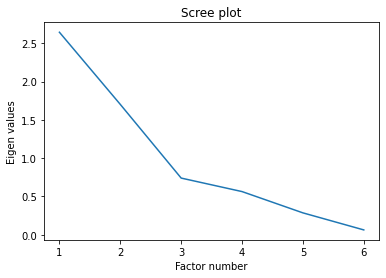

In [12]:
#scree plot
plt.plot(np.arange(1,n+1),eigval)
plt.title("Scree plot")
plt.ylabel("Eigen values")  #valeur propre
plt.xlabel("Factor number")
plt.show()

[0.44082893 0.72459292 0.84793705 0.94189209 0.98950481 1.        ]


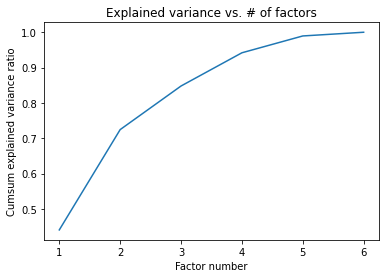

In [13]:
#cumul de variance expliquée

t = np.cumsum(acp.explained_variance_ratio_)
print(t)

plt.plot(np.arange(1,n+1),np.cumsum(acp.explained_variance_ratio_))  # 
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.show()

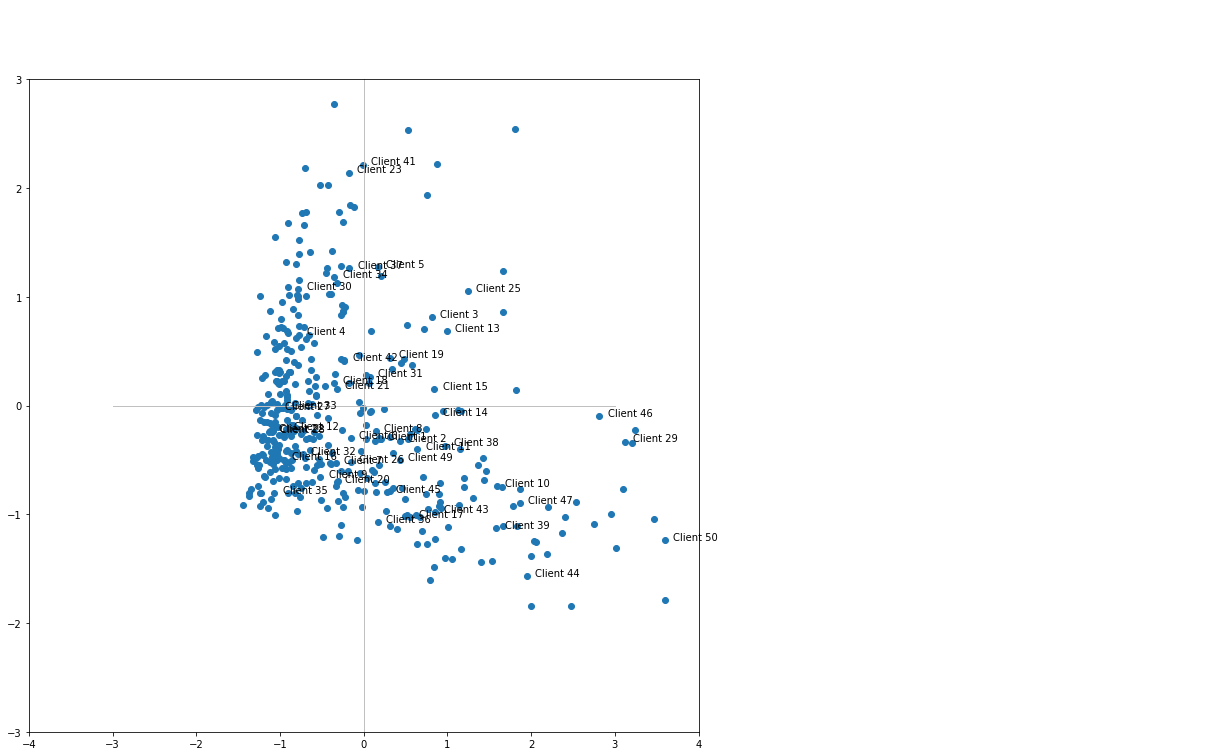

In [14]:
#positionnement des individus dans le premier plan
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-4,4) #même limites en abscisse  坐标范围
axes.set_ylim(-3,3) #et en ordonnée

# placement des points 
plt.scatter(coord[:,0],coord[:,1])     #只取coord前两列
#placement des étiquettes des observations   
for i in range(50):
     plt.annotate(data.index[i],(coord[i,0]+0.1,coord[i,1]))
#ajouter les axes
plt.plot([-3,3],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)
#affichage
plt.show()

In [15]:
#  结论
#note de Emeline et de Jacques est plus loin,  note de chloe et Béatrice est proche

In [16]:
# Qualité d'un individè
di = np.sum(Z**2,axis=1)
print(pd.DataFrame({'ID':data.index,'d_i':di}))

             ID        d_i
0      Client 1   0.632268
1      Client 2   0.566947
2      Client 3   5.436559
3      Client 4   1.283337
4      Client 5   2.487360
..          ...        ...
435  Client 436   8.093296
436  Client 437   6.084971
437  Client 438  13.899635
438  Client 439   1.195152
439  Client 440   2.082350

[440 rows x 2 columns]


In [17]:
#qualité de représentation des individus - COS2
cos2 = coord**2
for j in range(5):
     cos2[:,j] = cos2[:,j]/di
print(pd.DataFrame({'id':data.index,'COS2_1':cos2[:,0],'COS2_2':cos2[:,1]}))

             id    COS2_1    COS2_2
0      Client 1  0.059091  0.147225
1      Client 2  0.332872  0.190238
2      Client 3  0.121024  0.122206
3      Client 4  0.472434  0.332015
4      Client 5  0.011117  0.649903
..          ...       ...       ...
435  Client 436  0.093651  0.609412
436  Client 437  0.133861  0.462130
437  Client 438  0.864131  0.077791
438  Client 439  0.705153  0.000755
439  Client 440  0.586514  0.356281

[440 rows x 3 columns]


In [18]:
#contributions aux axes
ctr = coord**2
for j in range(5):
     ctr[:,j] = ctr[:,j]/(9*eigval[j])

print(pd.DataFrame({'id':data.index,'CTR_1':ctr[:,0],'CTR_2':ctr[:,1]}))

             id     CTR_1     CTR_2
0      Client 1  0.001569  0.006075
1      Client 2  0.007928  0.007039
2      Client 3  0.027640  0.043358
3      Client 4  0.025469  0.027807
4      Client 5  0.001162  0.105496
..          ...       ...       ...
435  Client 436  0.031840  0.321874
436  Client 437  0.034218  0.183515
437  Client 438  0.504567  0.070564
438  Client 439  0.035403  0.000059
439  Client 440  0.051306  0.048417

[440 rows x 3 columns]


In [19]:
#le champ components_ de l'objet ACP
print(acp.components_)

[[ 0.04288396  0.54511832  0.57925635  0.05118859  0.5486402   0.24868198]
 [ 0.52793212  0.08316765 -0.14608818  0.61127764 -0.25523316  0.50420705]
 [-0.81225657  0.06038798 -0.10838401  0.17838615 -0.13619225  0.52390412]
 [-0.23668559 -0.08718991  0.10598745  0.76868266  0.17174406 -0.55206472]
 [-0.04868278  0.82657929 -0.31499943 -0.02793224 -0.33964012 -0.31470051]
 [-0.03602539 -0.03804019  0.72174458 -0.01563715 -0.68589373 -0.07513412]]


In [20]:
#racine carrée des valeurs propres     C(CP,xs)
sqrt_eigval = np.sqrt(eigval)

In [22]:
#corrélation des variables avec les axes
corvar = np.zeros((6,6))
for k in range(6):
     corvar[:,k] = acp.components_[k,:] * sqrt_eigval[k]

#afficher la matrice des corrélations variables x facteurs
print(corvar)

[[ 0.06974378  0.68886221 -0.6987601  -0.1777082  -0.02602031 -0.00904023]
 [ 0.88654635  0.10851973  0.05194998 -0.0654639   0.44179588 -0.00954582]
 [ 0.94206631 -0.19062039 -0.09323953  0.07957747 -0.1683631   0.18111491]
 [ 0.08324992  0.79761402  0.15346028  0.57714209 -0.01492942 -0.00392399]
 [ 0.89227411 -0.33303614 -0.11716213  0.12894882 -0.18153322 -0.17211849]
 [ 0.40444082  0.65790499  0.45069909 -0.41450107 -0.16820333 -0.01885419]]


In [24]:
#on affiche pour les deux premiers axes
print(pd.DataFrame({'id':data.columns,'COR_1':corvar[:,0],'COR_2':corvar[:,1]}))

                 id     COR_1     COR_2
0             Fresh  0.069744  0.688862
1              Milk  0.886546  0.108520
2           Grocery  0.942066 -0.190620
3            Frozen  0.083250  0.797614
4  Detergents_Paper  0.892274 -0.333036
5        Delicassen  0.404441  0.657905


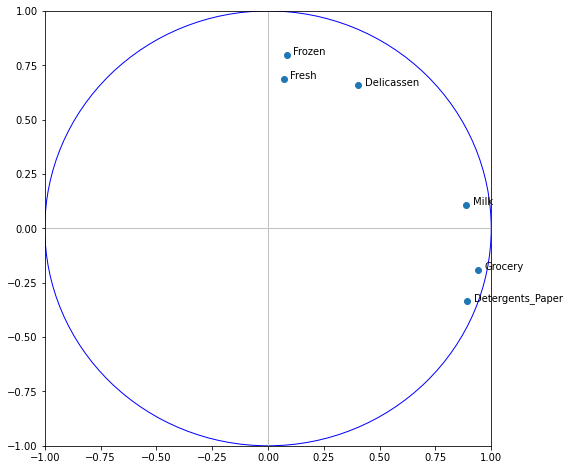

In [26]:
#cercle des corrélations pour les deux premiers axes
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)

# les points
plt.scatter(corvar[:,0],corvar[:,1])

#affichage des étiquettes (noms des variables)
for j in range(6):
     plt.annotate(data.columns[j],(corvar[j,0]+0.03,corvar[j,1]))

#ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

#ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)

#affichage
plt.show()

In [27]:
#cosinus carré des variables
cos2var = corvar**2
print(pd.DataFrame({'id':data.columns,'COS2_1':cos2var[:,0],'COS2_2':cos2var[:,1]}))


                 id    COS2_1    COS2_2
0             Fresh  0.004864  0.474531
1              Milk  0.785964  0.011777
2           Grocery  0.887489  0.036336
3            Frozen  0.006931  0.636188
4  Detergents_Paper  0.796153  0.110913
5        Delicassen  0.163572  0.432839


In [ ]:
#cercle des corrélations pour l'axe 1 et 3
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)

# les points
plt.scatter(corvar[:,0],corvar[:,2])

#affichage des étiquettes (noms des variables)
for j in range(6):
     plt.annotate(df.columns[j],(corvar[j,0]+0.03,corvar[j,2]))

#ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

#ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)
#affichage
plt.show()

In [28]:
#cosinus carré des variables
cos2var = corvar**2
print(pd.DataFrame({'id':data.columns,'COS2_1':cos2var[:,0],'COS2_2':cos2var[:,2]}))

                 id    COS2_1    COS2_2
0             Fresh  0.004864  0.488266
1              Milk  0.785964  0.002699
2           Grocery  0.887489  0.008694
3            Frozen  0.006931  0.023550
4  Detergents_Paper  0.796153  0.013727
5        Delicassen  0.163572  0.203130
